Task-2

•	Write a procedure that determines that maximum (positive, negative) maximum or minimum degree of a given signed graph.

 The degree of a vertex in a graph is the number of edges incident to that vertex. The positive degree of a vertex is the number of positive edges incident to it, while the negative degree is the number of negative edges incident to it. The maximum (positive/negative) degree is the highest positive/negative degree among all vertices, and the minimum degree is the smallest degree overall.

In [4]:
from itertools import combinations
import random
import itertools
import networkx as nx
import matplotlib.pyplot as plt
import re
import matplotlib.colors as mcolors
import time
from datetime import timedelta

from openpyxl import Workbook, load_workbook
import os

In [5]:
def add_entries_to_excel(entries, filepath):
    # If the file exists, load the existing workbook; otherwise, create a new workbook
    if os.path.exists(filepath):
        wb = load_workbook(filepath)
    else:
        wb = Workbook()
    
    # Select the active worksheet
    ws = wb.active
    
    # If the file is newly created, add column headers
    if not os.path.exists(filepath):
        ws.append(['Number of Vertex', 'Time without Visualization', 'Time with Visualization'])
    
    # Add entries
    ws.append(entries)
    
    # Save the workbook with the specified filepath
    wb.save(filepath)
    
def write_in_execl(filename, entries):
    # Specify the filepath where you want to save the Excel file
    filepath = os.getcwd() + '/performance_check/'

    # Add entries to Excel file with the specified filepath
    add_entries_to_excel(entries, filepath + filename)
    
def erdos_renyi_signed_graph(num_nodes, avg_degree):
    # Generate a random graph using Erdős-Rényi model
    G = nx.erdos_renyi_graph(num_nodes, avg_degree / (num_nodes - 1))
    
    # Assign random signs to the edges
    for u, v in G.edges():
        sign = random.choice([1, -1])
        G[u][v]["sign"] = sign
    
    return G
    

def visualize_signed_graph(G):
    
    # Visualize the graph with positive edges in green and negative edges in red
    pos_edges = [(u, v) for u, v, sign in G.edges(data="sign") if sign == 1]
    neg_edges = [(u, v) for u, v, sign in G.edges(data="sign") if sign == -1]

#     pos_nodes = set([u for u, v in pos_edges] + [v for u, v in pos_edges])
#     neg_nodes = set([u for u, v in neg_edges] + [v for u, v in neg_edges])

    pos = nx.spring_layout(G)
    
    plt.figure(figsize=(8,6))
    
    nx.draw_networkx_nodes(G, pos, nodelist=list(G.nodes()), node_color="white", node_size=500, edgecolors='black', linewidths=1.0)
#     nx.draw_networkx_nodes(G, pos, nodelist=neg_nodes, node_color="r", node_size=100)
    nx.draw_networkx_edges(G, pos, edgelist=pos_edges, edge_color="g")
    nx.draw_networkx_edges(G, pos, edgelist=neg_edges, edge_color="r")
    nx.draw_networkx_labels(G, pos,  font_size=12, font_color='black')
    
    plt.plot([0], color='green', label='Positive Connection')
    plt.plot([0], color='red', label='Negative Connection')

    # Adding legend
    plt.legend()

    plt.show()

In [6]:
def parse_signed_graph_file(file_path):
    graph = {}
    with open(file_path, 'r') as file:
        for line in file:
            vertex1, vertex2, sign = line.split()
            vertex1 = int(vertex1)
            vertex2 = int(vertex2)
            sign = int(sign)
            if vertex1 not in graph:
                graph[vertex1] = []
            if vertex2 not in graph:
                graph[vertex2] = []
            graph[vertex1].append(sign)
            graph[vertex2].append(sign)  # Add the opposite sign for the other vertex
    return graph

def preparing_graph_to_visualize(file_path):
    Grp = nx.Graph()
    graph_list = list()
    with open(file_path, 'r') as file:
        for line in file:
            source, target, weight = map(int, line.strip().split())
            val = (source, target, {'sign':weight})
            graph_list.append(val)
            
    Grp.add_edges_from(graph_list)
    return Grp


def visualize_signed_graph(G):

    # Visualize the graph with positive edges in green and negative edges in red
    
    pos = nx.spring_layout(G)
    positive_edges = [(u, v) for u, v, sign in G.edges(data="sign") if sign == 1]
    negative_edges = [(u, v) for u, v, sign in G.edges(data="sign") if sign == -1]

    plt.figure(figsize=(8,6))

    nx.draw_networkx_nodes(G, pos, nodelist = list(G.nodes()), node_color="white", node_size=500, edgecolors='black', linewidths=1.0)
    nx.draw_networkx_edges(G, pos, edgelist=positive_edges, edge_color='green')
    nx.draw_networkx_edges(G, pos, edgelist=negative_edges, edge_color='red')
    nx.draw_networkx_labels(G, pos, font_size=12, font_color='black')
    
    plt.plot([0], color='green', label='Positive Connection')
    plt.plot([0], color='red', label='Negative Connection')

    # Adding legend
    plt.legend()

#     plt.title("Output Graph")
    plt.tight_layout()


    plt.show()
    

    
def erdos_renyi_signed_graph(num_nodes, avg_degree):
    # Generate a random graph using Erdős-Rényi model
    G = nx.erdos_renyi_graph(num_nodes, avg_degree / (num_nodes - 1))
    
    # Assign random signs to the edges
    for u, v in G.edges():
        sign = random.choice([1, -1])
        G[u][v]["sign"] = sign
    
    return G

def convert_graph_to_dict(G):
    
    # making graph_dict for further purpose
    graph_dict = {}
    for u, v, sign in G.edges(data="sign"):
        if u not in graph_dict:
            graph_dict[u] = []
        if v not in graph_dict:
            graph_dict[v] = []
        graph_dict[u].append(sign)
        graph_dict[v].append(sign)    
            
    
    return graph_dict

In [7]:
def compute_signed_graph_degrees(graph):
    # Initialize variables to track maximum and minimum degrees
    max_positive_degree = 0
    max_negative_degree = 0
    min_degree = float('inf')
    max_degree = 0

    
    for vertex, neighbors in graph.items():
        # Initialize variables to count positive and negative degrees of the current vertex
        positive_degree = 0
        negative_degree = 0

        for neighbor in neighbors:
            # Count positive and negative edges
            if neighbor > 0:
                positive_degree += 1
            elif neighbor < 0:
                negative_degree += 1

        # Update maximum (positive/negative) degree if necessary
        max_positive_degree = max(max_positive_degree, positive_degree)
        max_negative_degree = max(max_negative_degree, negative_degree)

        # Update minimum degree if necessary
        total_degree = positive_degree + negative_degree
        min_degree = min(min_degree, total_degree)
        max_degree = max(max_degree,  total_degree)

    return max_positive_degree, max_negative_degree, min_degree, max_degree

Please enter maximum number of nodes wanted to check: 50
Maximum positive degree: 5
Maximum negative degree: 5
Minimum degree: 1
Maximum degree: 7


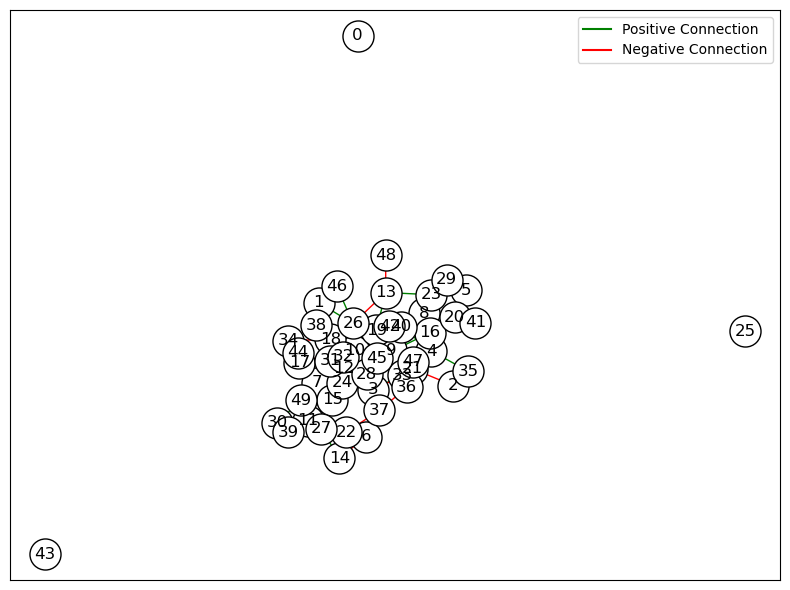

In [8]:
# # start recording performance timing
# start_time = time.monotonic()

# # taking the given example file
# file_path = fr"{os.getcwd()}/graph_test_files/highland.txt"

# # converting the file to readable dictionary format for further usage
# graph = parse_signed_graph_file(file_path)

# # finding positive and negative degree's minimum and maximum
# max_pos_deg, max_neg_deg, min_deg, max_deg = compute_signed_graph_degrees(graph)
# print("Maximum positive degree:", max_pos_deg)
# print("Maximum negative degree:", max_neg_deg)
# print("Minimum degree:", min_deg)
# print("Maximum degree:", max_deg)
# endtime_deg_WoV = time.monotonic()
# # converting the file into a Graph structure to visualize
# G = preparing_graph_to_visualize(file_path)

# # visualizing the graph
# visualize_signed_graph(G)

# # end recording performance timing
# endtime_deg_WV = time.monotonic()

# num_nodes = len(graph)
# filename = "performance_check_min_max_findings_file_type.xlsx" 
# totaltime_deg_WoV, totaltime_deg_WV = timedelta(seconds=endtime_deg_WoV - start_time), timedelta(seconds=endtime_deg_WV - start_time)
# deg_performance_entries = num_nodes, totaltime_deg_WoV, totaltime_deg_WV
# write_in_execl(filename, deg_performance_entries)

########################################################################################


nodes_to_check = 50
initial_avg_degree = 4
max_nodes_to_check = int(input("Please enter maximum number of nodes wanted to check: "))

# num_nodes = int(input("Please enter number of nodes for the graph: "))
# avg_degree = int(input("Please enter average number of degree for a node: "))

while(nodes_to_check <= max_nodes_to_check):
    
    start_time = time.monotonic() 
    
    num_nodes = nodes_to_check
    avg_degree = initial_avg_degree
    G = erdos_renyi_signed_graph(num_nodes, avg_degree) 
    graph = convert_graph_to_dict(G)

    # finding positive and negative degree's minimum and maximum
    max_pos_deg, max_neg_deg, min_deg, max_deg = compute_signed_graph_degrees(graph)

    print("Maximum positive degree:", max_pos_deg)
    print("Maximum negative degree:", max_neg_deg)
    print("Minimum degree:", min_deg)
    print("Maximum degree:", max_deg)
    endtime_deg_WoV = time.monotonic() 

    visualize_signed_graph(G)
    endtime_deg_WV = time.monotonic() 

    # storing the performance time in a excel file
    filename = "performance_check_min_max_findings.xlsx" 
    totaltime_deg_WoV, totaltime_deg_WV = timedelta(seconds=endtime_deg_WoV - start_time), timedelta(seconds=endtime_deg_WV - start_time)
    deg_performance_entries = num_nodes, totaltime_deg_WoV, totaltime_deg_WV
    write_in_execl(filename, deg_performance_entries)
    
    initial_avg_degree = initial_avg_degree * 2 
    nodes_to_check = nodes_to_check + 50

